# TP : Projet de data visualisation

Dans ce mini TP, nous allons réaliser une analyse graphique des données monétaire.
L’objectif est de réaliser un Jupyter Notebook présentant les caractéristiques des données.
Pour chaque question qui suit, rédiger un commentaire (en mode Markdown dans le
notebook).

1. Qu’est ce que le CAC40 ?
2. Importer les librairies nécessaires et charger les données
3. Afficher les données et commentez le dataset

> Le CAC 40 est le principal indice boursier de Paris. Il représente la capitalisation des 40 plus grandes entreprises françaises. L’évolution du CAC 40 est le reflet de la tendance générale des performances des grandes entreprises françaises sur les marchés financiers. Une baisse de CAC 40 est interprétée par les intervenants comme une diminution de la santé de l’économie française (mais comme les entreprises sont de plus en plus internationalisées, l’évolution du CAC 40 reflète aussi les variations de l’économie mondiale).
https://www.economie.gouv.fr/facileco/cac-40

In [91]:
# import des librairies classiques
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# import du fichier CAC40.csv, on précise ici les colonnes utilisés
# c'est équivalent à garder le dataset et supprimer les colonnes non utilisés
data = pd.read_csv("./../../data/CAC40.csv", usecols = ['Name','Date','Open','Closing_Price','Daily_High','Daily_Low','Volume'])

# on s'assure que le dataset est correctement chargé (ex: delimiter pas adapté, etc...)
data.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [92]:
# informations sur le contenu de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97648 entries, 0 to 97647
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           97648 non-null  object 
 1   Date           97648 non-null  object 
 2   Open           97418 non-null  float64
 3   Closing_Price  97646 non-null  float64
 4   Daily_High     97444 non-null  float64
 5   Daily_Low      97444 non-null  float64
 6   Volume         77195 non-null  object 
dtypes: float64(4), object(3)
memory usage: 5.2+ MB



Le dataset contient beaucoup de données, près de 98k lignes et finalement assez peu de colonnes.
Les colonnes correspondent à:

 - **Name**: le nom de la société au format textuel
 - **Date** : la date <span style="color:red">**au format textuel**</span>
 - **Open** : correspond à la valeur de l'indice de la société à l'ouverture de la bourse   
 - **Closing_price** : correspond à la valeur de l'indice de la société à la fermeture de la bourse 
 - **Daily_High** : correspond à la valeur maximal de l'indice de la société sur la journée 
 - **Daily_Low** : correspond à la valeur minimal de l'indice de la société sur la journée
 - **Volume** : correspond à la somme totale des transactions <span style="color:red">**au format textuel**</span>

## Safran

Dans la partie suivante nous allons nous focaliser sur la société **SAFRAN**. Safran est un acteur majeur de l'industrie aéronautique française. Il conçoit et équipe de nombreux avions à travers le monde.

In [93]:
# on liste les valeurs possibles
data['Name'].unique()

array(['Accor', 'Air Liquide', 'Airbus ', 'ArcelorMittal', 'Atos', 'AXA',
       'BNP Paribas', 'Bouygues', 'Cap Gemini', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Engie (ex GDF Suez',
       'EssilorLuxottica', 'Hermès (Hermes International', 'Kering',
       'LEGRAND', 'LOréal', 'LVMH Moet Hennessy Louis Vuitton',
       'Michelin (Compagnie Générale d Etablissements Michelin SCPA',
       'Orange', 'Pernod Ricard', 'Peugeot', 'Publicis', 'Renault',
       'SAFRAN', 'Saint-Gobain', 'Sanofi', 'Schneider Electric',
       'Société Générale (Societe Generale', 'Sodexo',
       'STMicroelectronics', 'TOTAL', 'Unibail-Rodamco',
       'Veolia Environnement', 'VINCI', 'Vivendi', 'Worldline SA'],
      dtype=object)

In [94]:
# On crée le dataset SAFRAN attention au nommage ("case sentive")
safran = data[data['Name'] == 'SAFRAN'].copy()

Pour info, on réalise une copie pour éviter de modifer des data dans le 1er dataset
> safran = data[data['Name'] == 'SAFRAN'] fonctionne aussi

**MAIS** 
si on modifie des valeurs dans le dataset safran on modifie également dans le dataset data

4. En utilisant une technique de représentation graphique la plus adaptée, donnez la
courbe d’évolution du cours d’ouverture au cours du temps.
5. Que peut on observer ?

In [95]:
safran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 64997 to 67597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           2601 non-null   object 
 1   Date           2601 non-null   object 
 2   Open           2599 non-null   float64
 3   Closing_Price  2601 non-null   float64
 4   Daily_High     2600 non-null   float64
 5   Daily_Low      2600 non-null   float64
 6   Volume         1494 non-null   object 
dtypes: float64(4), object(3)
memory usage: 162.6+ KB


In [145]:
# éventuellement pour s'assurer que les dates sont uniques
len(safran.Date.unique())

2601

In [96]:
safran.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
64997,SAFRAN,2020-04-03,67.68,63.30,67.68,63.30,439
64998,SAFRAN,2020-04-02,65.96,68.82,70.56,65.96,"1,738"
64999,SAFRAN,2020-04-01,76.92,66.74,76.92,66.74,729
65000,SAFRAN,2020-03-31,84.48,80.80,85.60,80.06,686
65001,SAFRAN,2020-03-30,86.58,83.96,87.00,81.96,164


In [97]:
# Conversion de la colonne 'Date' au format date
safran['Date'] = pd.to_datetime(safran['Date']) # pas d'autres paramètres nécessaires car l'aspect de la date est bon

# création de nouvelles colonnes qui vont etre utilisés pour la suite
safran['Year'] = safran['Date'].dt.year
safran['Month'] = safran['Date'].dt.month

### Evolution du cours au cours du temps

Le graphique "Lineplot" est le plus adapté pour la représentation d'une courbe pour ce type de données.

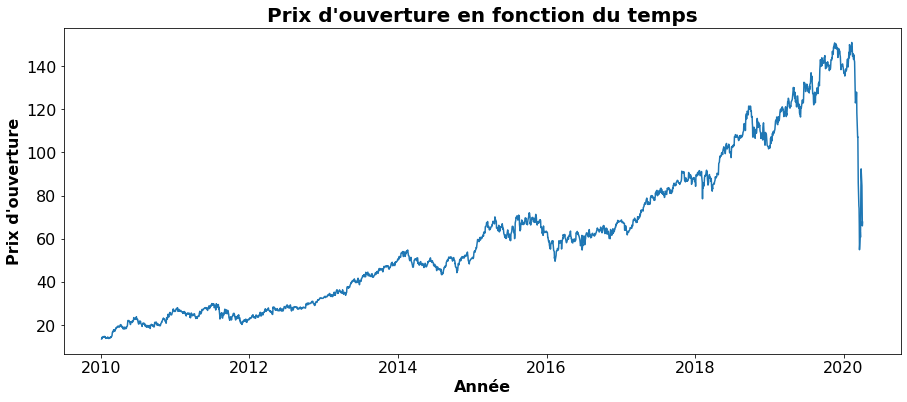

In [98]:
# utilisation de Line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(safran['Date'], safran['Open'] )

ax.set_title('Prix d\'ouverture en fonction du temps', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Prix d\'ouverture', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

On constate une évolution en constante progression depuis 2010. Depuis 2010, l'action valait moins de 20€ pour atteindre les 150€ en 2019.

On aperçoit, une très grosse chute en début 2020, celle-ci est due au COVID 19. L'industrie aéronautique était très fortement impactée avec une baisse de -95% par rapport à la même période l'année passée.

#### Traitement des données manquantes

In [99]:
# identification des valeurs vides
safran.isna().sum()

Name                0
Date                0
Open                2
Closing_Price       0
Daily_High          1
Daily_Low           1
Volume           1107
Year                0
Month               0
dtype: int64

On constate qu'il manque seulement 2 données pour la colonne 'Open'.
Il manque également une valeur pour Daily_High et Daily_Low.

Pour ces deux colonnes le nombre de données manquantes et très faible.
En revanche, il manque beaucoup d'informations pour la colonne Volume.


In [119]:
""" Fonction qui permet de calculer le % de données manquantes"""
def donnees_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        pourcentage = round((dataset[colonne].isnull().sum()/dataset.shape[0]) * 100, 2)
        print ("Données manquantes pour {}: {}%".format(colonne,pourcentage))
        #print(f"Percentage of missing values in :" {round(sum(pd.isnull(dataset.[colonne]))/dataset.shape[0],2)}\n")
    
donnees_manquantes(safran, ['Open', 'Daily_High', 'Daily_Low','Volume', ])

Données manquantes pour Open: 0.08%
Données manquantes pour Daily_High: 0.04%
Données manquantes pour Daily_Low: 0.04%
Données manquantes pour Volume: 42.56%


In [122]:
# Récupération des indices des données manquantes
def position_donnes_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        index_missing = dataset[pd.isnull(dataset[colonne])].index
        print(list(index_missing))
    
position_donnes_manquantes(safran,['Open', 'Daily_High', 'Daily_Low'])    

[66937, 67189]
[67189]
[67189]


En ce qui concerne les données faiblement représentés, il est possible de remplacer les données sans biaiser le dataset ou de supprimer ces données car ces données manquantes sont négligeables.

Ici, nous avons le choix. Ainsi, pour les données manquantes on prendra la valeure précédente.

In [46]:
# On recupère la valeur de la journée précédente
# le paramètre 'bfill' (Backward Fill) ou 'ffill' (Forward filling)
safran['Open'] = safran['Open'].fillna(method='bfill')
safran['Daily_Low'] = safran['Daily_Low'].fillna(method='bfill')
safran['Daily_High'] = safran['Daily_High'].fillna(method='bfill')

En revanche pour le volume, les données manquantes sont très nombreuses. La suppression des données représentré une réduction drastique du nombre de données. 

Ici, on privilégie le remplacement des données manquantes par la valeure moyenne.

In [123]:
# affichage des valeures numériques
safran.describe()

,Open,Closing_Price,Daily_High,Daily_Low,Year,Month
count,2599.000000,2601.000000,2600.000000,2600.000000,2601.000000,2601.000000
mean,61.144067,61.126617,61.414873,60.864223,2014.624375,6.381007
std,35.202093,35.175884,35.415666,34.970087,2.968295,3.451835
min,13.540000,13.750000,13.750000,13.540000,2010.000000,1.000000
25%,28.290000,28.260000,28.290000,28.192500,2012.000000,3.000000
50%,55.180000,54.980000,55.405000,54.760000,2015.000000,6.000000
75%,82.185000,82.180000,82.595000,81.665000,2017.000000,9.000000
max,150.950000,151.200000,151.200000,149.600000,2020.000000,12.000000


On s'aperçoit que la donnée Volume n'est pas numérique, il faut donc changer le "type"

In [125]:
# changement du type de la colonne Volume, il faut rajouter le paramètre errors='coerce'
# cf. documentation (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html): 
#    If ‘coerce’, then invalid parsing will be set as NaN.
# Ce qui nous permet de remplacer les données Text --> Int [sauf pour les données non remplies] 

safran['Volume'] = pd.to_numeric(safran['Volume'],errors='coerce')

In [127]:
# la donnée Volume est maintenant numérique on peut accéder à la moyenne, etc...
safran.describe()

,Open,Closing_Price,Daily_High,Daily_Low,Volume,Year,Month
count,2599.000000,2601.000000,2600.000000,2600.000000,1400.000000,2601.000000,2601.000000
mean,61.144067,61.126617,61.414873,60.864223,202.772143,2014.624375,6.381007
std,35.202093,35.175884,35.415666,34.970087,209.034358,2.968295,3.451835
min,13.540000,13.750000,13.750000,13.540000,1.000000,2010.000000,1.000000
25%,28.290000,28.260000,28.290000,28.192500,50.000000,2012.000000,3.000000
50%,55.180000,54.980000,55.405000,54.760000,124.000000,2015.000000,6.000000
75%,82.185000,82.180000,82.595000,81.665000,294.250000,2017.000000,9.000000
max,150.950000,151.200000,151.200000,149.600000,999.000000,2020.000000,12.000000


In [126]:
# mais il y a toujours des données manquantes
safran.isna().sum()

Name                0
Date                0
Open                2
Closing_Price       0
Daily_High          1
Daily_Low           1
Volume           1201
Year                0
Month               0
dtype: int64

In [128]:
# récupération de la valeur moyenne
mean_value=safran['Volume'].mean()
# remplissage des données vides
safran['Volume'].fillna(value=safran['Volume'].mean(), inplace=True)

In [129]:
safran.isna().sum()

Name             0
Date             0
Open             2
Closing_Price    0
Daily_High       1
Daily_Low        1
Volume           0
Year             0
Month            0
dtype: int64

#### Représentation des échanges

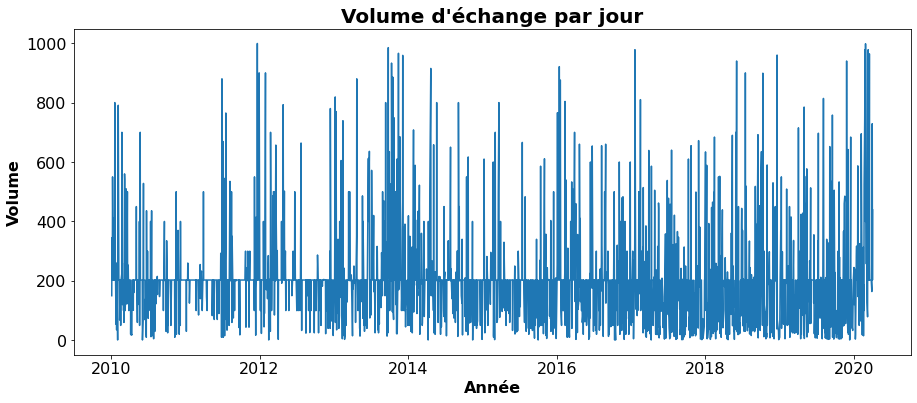

In [132]:
# lineplot se prete bien à cette représentation
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(safran['Date'], safran['Volume'] )

ax.set_title('Volume d\'échange par jour', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Volume', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

Le graphique est très peu lisible car il trace une évolution journalière. De plus, on distingue une certaine droite autour de 200, ceci est du au remplissage par la valeure moyenne.
Il sera préférable de tracer l'évolution avec une échelle de temps plus importante.


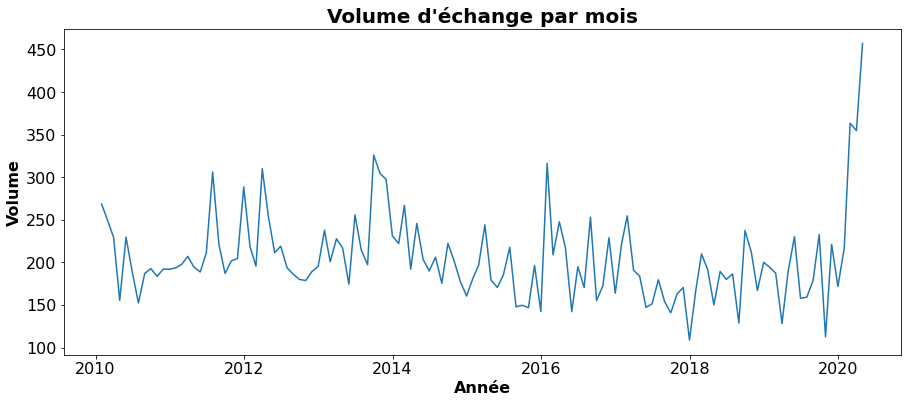

In [135]:
# Nous allons concaténer les données en se basant le mois et ça dans un nouveau dataframe
y = safran[['Date','Volume']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)

# ici on précise qu'on veut sample mais par mois et on veut récuperer la valeure moyenne pour le mois
y = y.resample('1M').mean()
y['Date'] = y.index

# On retrace la courbe
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(y['Date'], y['Volume'] )

ax.set_title('Volume d\'échange par mois', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Volume', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)



Le graphique est beaucoup plus lisible. Le volume est oscille en fonction des mois, entre 150 et 300. On observe toutefois, un grand pic d'échanges au cours de l'année 2020, dûe au COVID-19.

> #### A retenir 
- Une petite période: le signal contient beaucoup de bruit, mais on a beaucoup d'infos
- Grande période : signal peu bruyant du coup plus lisible, mais moins d'informations




### Caractère saisonnier

Dans les données avec des dates, il est possible de détecter des cycles sur les périodes de temps.

In [136]:
# liste des années
safran['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010],
      dtype=int64)

Text(0, 0.5, 'Prix')

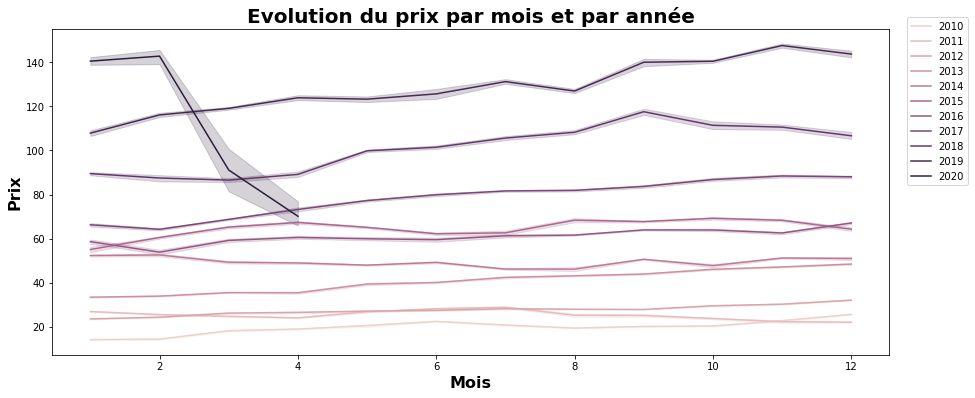

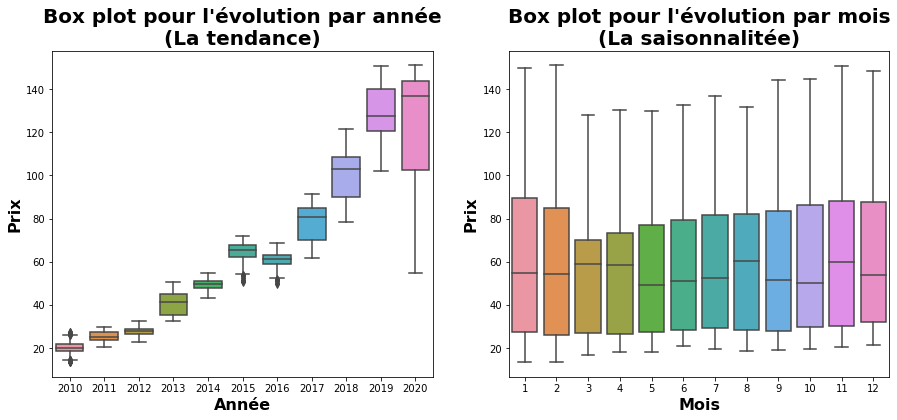

In [142]:
# on s'intéresse uniquement a la valeur de l'action
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(safran['Month'], safran[variable], hue = safran['Year'])
ax.set_title('Evolution du prix par mois et par année', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Mois', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Prix', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend(labels = [str(2010+i) for i in range(11)], bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(safran['Year'], safran[variable], ax=ax[0])
ax[0].set_title('Box plot pour l\'évolution par année\n(La tendance)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Prix', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(safran['Month'], safran[variable], ax=ax[1])
ax[1].set_title('Box plot pour l\'évolution par mois\n(La saisonnalitée)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mois', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Prix', fontsize = 16, fontdict=dict(weight='bold'))


#### Evolution du prix par année

On constate que la courbe de 2019 est très haute, c'était l'année la plus profitable pour l'entreprise avec une évolution importante de 110€ à 150€. On n'observe cependant, pas une énorme augmentation sur une année particulière. Ce qui rejoint l'observation initiale d'une constante progression depuis 2010.

#### Boite a moustache par année

On n'observe par de cycle sur les années, l'évolution semble légèrement exponentielle, avec un léger recul en 2016.

#### Boite a moustache par mois

La variation par mois est clairement stable, ce qui démontre qu'il n'y a pas d'effet de saison sur le cours de l'action.